In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

In [13]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b4e1890>]],
      dtype=object)

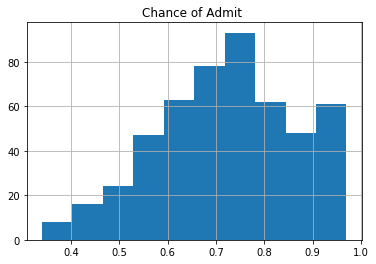

In [457]:
df.hist(['Chance of Admit '])

In [29]:
# input
df['bias'] = [1] * df.shape[0]
data = df[['GRE Score', 'TOEFL Score', 'University Rating', 'bias']].to_numpy()
data

array([[337, 118,   4,   1],
       [324, 107,   4,   1],
       [316, 104,   3,   1],
       ...,
       [330, 120,   5,   1],
       [312, 103,   4,   1],
       [327, 113,   4,   1]])

In [30]:
# output
label = df[['Chance of Admit ']].to_numpy()
label.shape

(500, 1)

In [477]:
# W2 = W2 - lr * dJ/dW2 (di,dj,dk)
# y_pred = h1*i + h2*j + 1*k
# dJ/di = sum(y_pred_i - y_i) * h1
# dJ/dj = (y_pred - y) * h2
# dJ/dj = (y_pred - y) * 1

# h1 = ax1 + bx2 +cx3 + d
# y_pred = i*h1 + j*h2 + k*1
# J = (y_pred - y) ** 2 / 2
# dJ/da = (y_pred - y) * i * x1
# dJ/db = (y_pred - y) * i * x2
# dJ/dc = (y_pred - y) * i * x3
# dJ/dc = (y_pred - y) * i * 1

# dJ/de = (y_pred - y) * j * x1
# dJ/df = (y_pred - y) * j * x2
# dJ/dg = (y_pred - y) * j * x3
# dJ/dh = (y_pred - y) * j * 1

## Necessary functions

In [168]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def computeCost(y_pred, y):
    cost = np.sum((y_pred - y) ** 2) / (2 * y_pred.shape[0])
    return cost

def computeGrad(y_pred, y, H, W1, W2, X):
    # H.T x (y_pred - y)
    # W2 update
    dJdW2 = np.dot(np.transpose(H), y_pred - y)
    
    # W1 update -> (4,2)
    # x -> (500, 4)
    dJdH = np.dot(y_pred - y, W2[:-1].T)
    dJdW1 = np.dot(X.T, dJdH)
    
    assert dJdW1.shape == W1.shape
    assert dJdW2.shape == W2.shape
    
    return dJdW1, dJdW2

In [476]:
# X -> W1(a,b,..,h) -> H -> W2(i,j,k) -> y_pred
W1 = np.random.rand(4 ,2)
W2 = np.random.rand(3 ,1)

## hyperparameters

In [475]:
cnt = 0
lr = 1e-10
n_epoch = 2000

## Training

In [456]:
logger = []
for cnt in range(1, n_epoch + 1):
    # forward pass
    Z = np.dot(data, W1)
    # adding bias to hidden layer
    H = np.ones((Z.shape[0], Z.shape[1] + 1))
    H[:,:2] = Z
    # prediction
    y_pred = np.dot(H, W2)

    # cost
    cost = computeCost(y_pred, label)

    # update
    dJdW1, dJdW2 = computeGrad(y_pred, label, H, W1, W2, data)
    W1 -= lr*dJdW1
    W2 -= lr*dJdW2

    print(f"{cnt}: {cost}", end='\r')
    logger.append(cost)

In [474]:
#dot -> (4,3) . (3,2) = (4,2)
#multiply -> (4,3) x (4,3) 

## Plotting

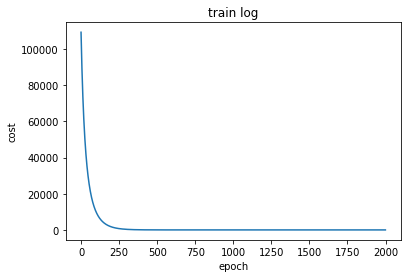

In [453]:
plt.plot(range(n_epoch), logger)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('train log')
plt.show()